In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [3]:
mat = scipy.io.loadmat("migrate_rates.mat")
model_mat = scipy.io.loadmat("migration_model.mat")

In [4]:
migration = pd.DataFrame(mat["migratesS1"])
migration.columns = ["year", "treatment", "control", "exp_response", "sd_err"]

In [5]:
model = pd.DataFrame(model_mat["m_rates_model"])

In [6]:
model.columns = ["model_result"]
model.dropna(inplace = True)

In [7]:
migration.head()

,year,treatment,control,exp_response,sd_err
0,2008.0,58.0,36.0,22.0,2.4
1,2009.0,46.7,37.5,9.2,2.5
2,2010.0,NaN,NaN,NaN,NaN
3,2011.0,39.0,32.0,7.0,3.3
4,2012.0,NaN,NaN,NaN,NaN


In [8]:
model = model.merge(migration["year"], left_index = True, right_index = True)

In [9]:
model.head()

,model_result,year
0,20.587670,2008.0
1,3.840983,2009.0
3,1.504385,2011.0
5,0.480123,2013.0


In [10]:
migration["upper_90"] = migration.exp_response + 1.96*migration.sd_err
migration["lower_90"] = migration.exp_response - 1.96*migration.sd_err

In [11]:
migration.dropna(inplace = True)

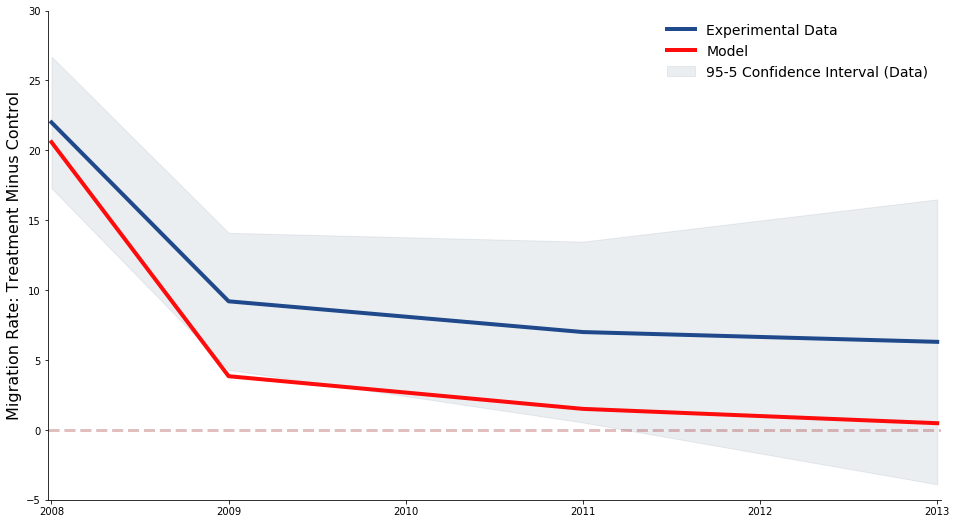

In [13]:
fig, ax = plt.subplots(figsize = (16,9))

mike_blue = tuple(np.array([20, 64, 134]) / 255)

ax.plot(migration.year, migration.exp_response, alpha = 0.95, color = mike_blue, linewidth = 4, linestyle= "-"
        , label = "Experimental Data")

ax.plot(model.year, model.model_result, alpha = 0.95, color = "red", linewidth = 4, linestyle= "-"
        , label = "Model")

ax.fill_between(migration.year, migration.lower_90, migration.upper_90, color = "#3F5D7D", alpha = 0.1
               , label = "95-5 Confidence Interval (Data)")

ax.legend(loc = 0, frameon  = False, fontsize = 14)

ax.hlines(0, 2007.98, 2013.02,
           linewidth = 3, color = 'darkred', alpha =0.25, linestyle = "--")

ax.set_ylim(-5,30)
ax.set_xlim(2007.98,2013.02)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_ylabel('Migration Rate: Treatment Minus Control', fontsize = 16)

fig_path = "C:\\github\\welfare_migration\\slides\\TALK-FIGURES\\"

plt.savefig(fig_path + "migration_rates_model_data.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

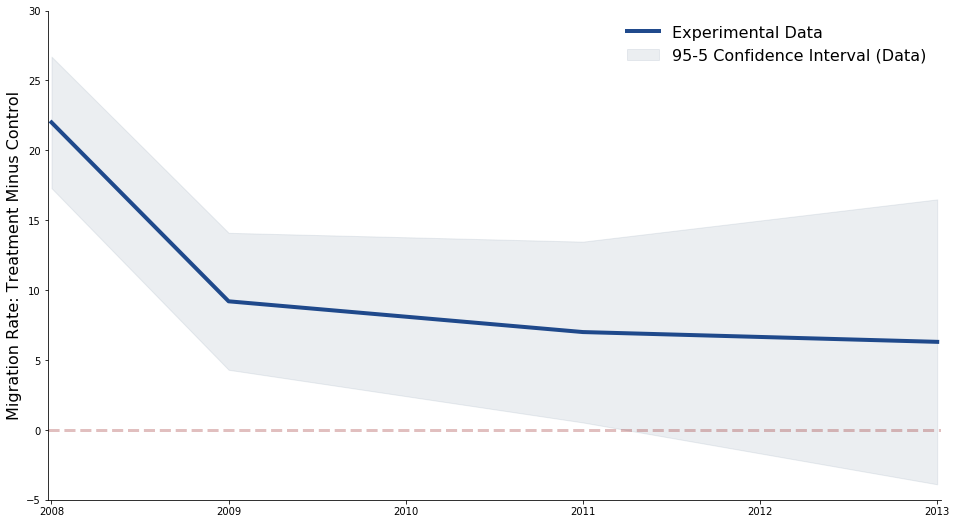

In [15]:
fig, ax = plt.subplots(figsize = (16,9))

mike_blue = tuple(np.array([20, 64, 134]) / 255)

ax.plot(migration.year, migration.exp_response, alpha = 0.95, color = mike_blue, linewidth = 4, linestyle= "-"
        , label = "Experimental Data")

ax.fill_between(migration.year, migration.lower_90, migration.upper_90, color = "#3F5D7D", alpha = 0.1
               , label = "95-5 Confidence Interval (Data)")

ax.legend(loc = 0, frameon  = False, fontsize = 16)

ax.hlines(0, 2007.98, 2013.02,
           linewidth = 3, color = 'darkred', alpha =0.25, linestyle = "--")

ax.set_ylim(-5,30)
ax.set_xlim(2007.98,2013.02)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_ylabel('Migration Rate: Treatment Minus Control', fontsize = 16)

fig_path = "C:\\github\\welfare_migration\\slides\\TALK-FIGURES\\"

plt.savefig(fig_path + "migration_rates_data.pdf", bbox_inches = "tight", dip = 3600)

plt.show()